In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import mglearn

#estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

C:\Users\xenia\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\xenia\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
wifidf = pd.read_csv('wifidfnew.csv')

In [3]:
validationdf = pd.read_csv('validationdfnew.csv')

In [21]:
#features
X_train = pd.concat([wifidf.iloc[:, 1:521], wifidf.iloc[:, 524]], axis=1)
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


In [22]:
X_train = X_train.replace(100, 'nosignal')
X_train.loc[X_train < -77] = 'badsignal'

TypeError: '<' not supported between instances of 'str' and 'int'

In [15]:
X_train

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,1
1,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,1
2,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,-97,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,1
3,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,1
4,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,1
19933,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,2
19934,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,1
19935,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,...,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,nosignal,1


In [14]:
y_train = wifidf.iloc[:, 523]
y_train.head()

0    2
1    2
2    2
3    2
4    0
Name: FLOOR, dtype: int64

In [15]:
#Testing Set (X Testing)
#X_validation = pd.concat([validationdf.iloc[:, 1:521], validationdf.iloc[:, 524]], axis=1)
#X_validation.head()

In [16]:
#Testing Set (X Testing)
X_validation = validationdf.iloc[:, 1:521]
X_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [17]:
X_validation = X_validation.astype(float)

In [18]:
X_validation = 10**X_validation

In [19]:
X_validation

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100
1,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100
2,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100
3,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100
4,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100
1107,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100
1108,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100
1109,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100


In [20]:
X_validation = pd.concat([X_validation, validationdf.iloc[:, 524]], axis=1)

In [21]:
X_validation

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1
1,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,2
2,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,2
3,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,2
4,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,2
1107,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,2
1108,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,0
1109,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,...,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,1.000000e+100,0


In [22]:
list(X_validation.columns)

['WAP001',
 'WAP002',
 'WAP003',
 'WAP004',
 'WAP005',
 'WAP006',
 'WAP007',
 'WAP008',
 'WAP009',
 'WAP010',
 'WAP011',
 'WAP012',
 'WAP013',
 'WAP014',
 'WAP015',
 'WAP016',
 'WAP017',
 'WAP018',
 'WAP019',
 'WAP020',
 'WAP021',
 'WAP022',
 'WAP023',
 'WAP024',
 'WAP025',
 'WAP026',
 'WAP027',
 'WAP028',
 'WAP029',
 'WAP030',
 'WAP031',
 'WAP032',
 'WAP033',
 'WAP034',
 'WAP035',
 'WAP036',
 'WAP037',
 'WAP038',
 'WAP039',
 'WAP040',
 'WAP041',
 'WAP042',
 'WAP043',
 'WAP044',
 'WAP045',
 'WAP046',
 'WAP047',
 'WAP048',
 'WAP049',
 'WAP050',
 'WAP051',
 'WAP052',
 'WAP053',
 'WAP054',
 'WAP055',
 'WAP056',
 'WAP057',
 'WAP058',
 'WAP059',
 'WAP060',
 'WAP061',
 'WAP062',
 'WAP063',
 'WAP064',
 'WAP065',
 'WAP066',
 'WAP067',
 'WAP068',
 'WAP069',
 'WAP070',
 'WAP071',
 'WAP072',
 'WAP073',
 'WAP074',
 'WAP075',
 'WAP076',
 'WAP077',
 'WAP078',
 'WAP079',
 'WAP080',
 'WAP081',
 'WAP082',
 'WAP083',
 'WAP084',
 'WAP085',
 'WAP086',
 'WAP087',
 'WAP088',
 'WAP089',
 'WAP090',
 'WAP091',

In [23]:
#Ground Truth (y_test) 
y_validation = validationdf.iloc[:, 523]
y_validation_count = len(y_validation.index)
print('The number of observations in the Y training set are:',str(y_validation_count))
y_validation.head()

The number of observations in the Y training set are: 1111


0    1
1    4
2    4
3    4
4    2
Name: FLOOR, dtype: int64

In [24]:
X_train.shape, X_validation.shape

((19937, 521), (1111, 521))

In [25]:
#Models
modelknn = KNeighborsClassifier(n_neighbors=3)
modellm = LogisticRegression()
modelsvm = LinearSVC()
modelrf = RandomForestClassifier()

In [ ]:
modelknn.fit(X_train, y_train)
modellm.fit(X_train,y_train)
modelsvm.fit(X_train,y_train)
modelrf.fit(X_train,y_train)

C:\Users\xenia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xenia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [41]:
modelknn.score(X_train,y_train)

0.988012238551437

In [42]:
modellm.score(X_train,y_train)

0.9277223253247731

In [43]:
modelsvm.score(X_train,y_train)

0.9162361438531373

In [44]:
modelrf.score(X_train,y_train)

0.9996990520138436

In [15]:
predictions = modelrf.predict(X_validation)

In [16]:
y_validation

0       1
1       4
2       4
3       4
4       2
       ..
1106    3
1107    3
1108    0
1109    0
1110    0
Name: FLOOR, Length: 1111, dtype: int64

In [17]:
predictions

array([3, 3, 4, ..., 0, 0, 0], dtype=int64)

In [18]:
confusion = confusion_matrix(y_validation, predictions)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[114   7  11   0   0]
 [ 23 374  54  11   0]
 [  2  22 252  30   0]
 [  1   0  18 151   2]
 [  1   0   0  15  23]]


In [19]:
accuracy = accuracy_score(y_validation, predictions)

In [20]:
accuracy

0.8226822682268227

In [21]:
sum(abs(y_validation - predictions))

226

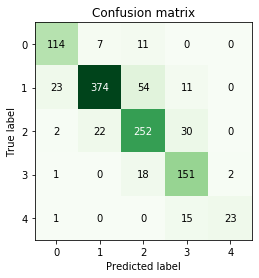

In [36]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_validation, predictions), 
    xlabel='Predicted label', ylabel='True label', 
    xticklabels= '01234', yticklabels='01234', cmap=plt.cm.Greens, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()